Угадай! _ _ _ _ _ 
Количество попыток:  9
Введите букву: р


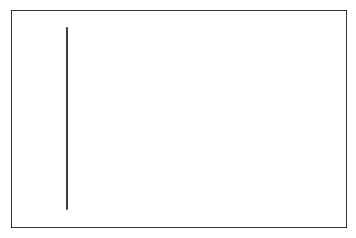

Количество попыток:  8
_ _ _ _ _
Введите букву: о


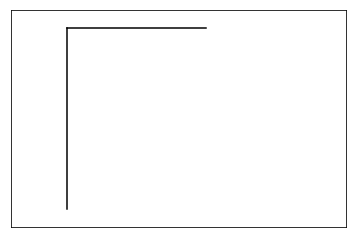

Количество попыток:  7
_ _ _ _ _
Введите букву: т


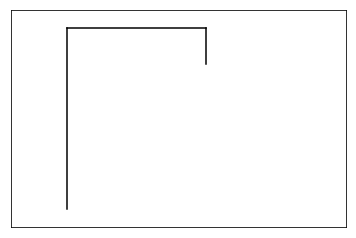

Количество попыток:  6
_ _ _ _ _
Введите букву: е


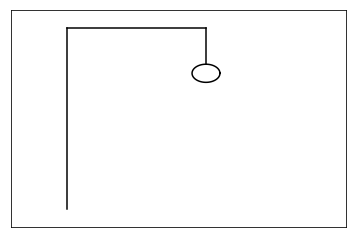

Количество попыток:  5
_ _ _ _ _
Введите букву: н


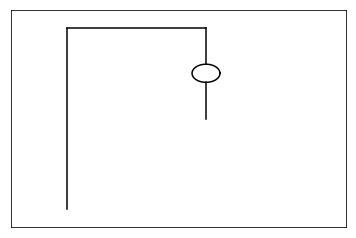

Количество попыток:  4
_ _ _ _ _
Введите букву: д


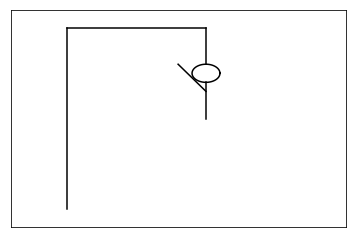

Количество попыток:  3
_ _ _ _ _
Введите букву: к
Количество попыток:  3
_ _ к _ _
Введите букву: х


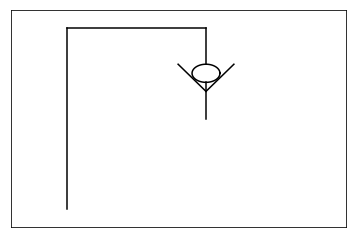

Количество попыток:  2
_ _ к _ _
Введите букву: л


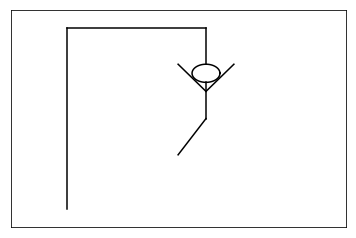

Количество попыток:  1
_ _ к _ _
Введите букву: д
Не повторяйся!
Введите букву: с


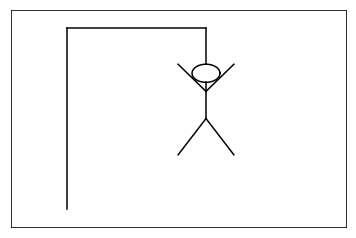

Количество попыток:  0


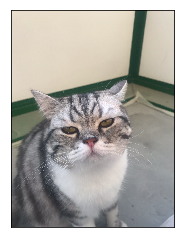

Проиграл :c
Слово было:  бэкап


In [4]:
import random
import re
import matplotlib.pyplot as plt
import numpy as np

with open('Gallows.txt',"r", encoding="utf-8") as file:
    words = file.read().split()

image_win = plt.imread("image_win.jpg")    
image_lose = plt.imread("image_lose.jpg")
    
class Gallows:
    def start(self):
        self.number_of_choice = 9
        self.word = self.choice_word()
        self.word_guess = ['_' for i in self.word]  
        self.word_not_guess = []
        print('Угадай!', '_ '*len(self.word))
        print('Количество попыток: ',self.number_of_choice)
        return self.guess_letters()

    def choice_word(self):
        return random.choice(words)

    def guess_letters(self):
        self.a = input('Введите букву: ').lower()
        return self.main_func()

    def main_func(self):
        if self.a=='q':
            return 
        
        if self.a==self.word:
            self.draw_win()
            return print('Conglatulations!')
        
        if self.check():
        
            for i in range(len(self.word)):
                if self.a==self.word[i]:
                    self.word_guess[i] = self.a
            if self.a not in self.word: 
                self.number_of_choice-=1
                self.draw()
            print('Количество попыток: ',self.number_of_choice)
            if self.number_of_choice==0:
                self.draw_lose()
                print('Проиграл :c')
                return print('Слово было: ',self.word)    
            print(' '.join(self.word_guess))
            if '_' not in self.word_guess:
                self.draw_win()
                print('Conglatulations!')
                return 
            else: self.guess_letters()
            
    def check(self):
        if self.a in self.word_not_guess:
            print("Не повторяйся!")
            return self.guess_letters()
        elif re.findall('[а-яА-ЯёЁ]',self.a)==[]:
            print("Некорректный символ, нужна кириллица")
            return self.guess_letters()
        else: 
            self.word_not_guess.append(self.a)
            return True
    
    def draw(self):
        X = [[0,0],[0,5],[5,5],[0.5],[5,5],[5,4],[5,6],[5,4],[5,6]]
        Y = [[0,10],[10,10],[10,8],[0.5],[7,5],[6.5,8],[6.5,8],[5,3],[5,3]]
        for i in range(9-self.number_of_choice):
            if i==3:
                theta = np.linspace(0,2*np.pi,100)
                circle_x = 5+X[i]*np.cos(theta)
                circle_y = 7.5+Y[i]*np.sin(theta)
                plt.plot(circle_x,circle_y,color='black')
            else: plt.plot(X[i],Y[i],color='black')
        plt.xticks([])
        plt.yticks([])
        plt.xlim(-2, 10)
        plt.ylim(-1, 11)
        plt.show()
        
    def draw_win(self):
        plt.imshow(image_win)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    def draw_lose(self):
        plt.imshow(image_lose)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
gallow = Gallows()
gallow.start()